# HW2: Using Functions to Make Repeated Calculations

In this Notebook we will demo the use of functions to make repeat calculations. 

Question 5 in the HW says: "Most of the neutral hydrogen in the atmosphere of stars is in the ground state.  Show that this is true by comparing the ground state occupation number to that of the first excited state for a variety of stellar surface temperatures (3000K, 6000K, 10,000K, and 30,000K).  Note the multiplicity of the ground state of hydrogen is g = 2 and of the first excited state is g = 6."

This requires us to make use of the Boltzman Equation, which give the ratio of the occupation numbers in different states, 

$\frac{n_2}{n_1} = \frac{g_2}{g_1} \exp \left(- \frac{\Delta E}{kT} \right)$ 

(see Equation 5.68 in Ryden & Peterson). We also need to recall that $\Delta E = 10.2$ eV to take an electron of hydrogen from the ground state to the $n=2$ state (see pg 136 of R&P).

The below code defines a function ```boltzman``` which will calculate this for any input values of $T, \Delta E, g_1, g_2$. 

It then calculates the value for $T=3000$ K. Run the code again to calculate the other values and make sure to comment if you have demonstrated that "Most of the neutral hydrogen in the atmosphere of stars is in the ground state". 

In [13]:
import numpy as np

# The part between "def" and "return" is our function. 
# Will need to enter dE in eV and T in K for this to give the correct answer.
def boltzman(T,dE,g1,g2):
# Boltman: Calculates the occupation number for electron in energy levels given an input 
# energy difference, dE (in eV), Temperature, T (in K) and the multiplicity values of the 
# energy levels
     k = 8.61733034e-5 #Boltzman constant in units of eV/K
     return (g2/g1)*np.exp(-dE/(k*T))

# The code below returns the value for T=3000K (the fraction of atoms which 
# are in the excited state). Run the code for the other values of T to answer the question.
T = 3000
dE = 10.2
g1 = 2
g2 = 6
print('The fraction of Hydrogen atoms in the exited state at T = ', T, 'K is ', boltzman(T,dE,g1,g2))

    




The fraction of Hydrogen atoms in the exited state at T =  3000 K is  2.1972001196560707e-17


# Shared Functions

There are many previously defined functions in python. A really useful library of functions for astronomy is called ```astropy```: https://www.astropy.org/. This is installed on our Jupyter Hub, so can be imported and used really easilly. I have put an example below (which is taken from http://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html#sphx-glr-generated-examples-coordinates-plot-obs-planning-py) where ```astropy``` functions are used to work out when a particular object can be observed. 

## Astropy Example of Plotting Star Co-ordinates

Let’s suppose you are planning to visit picturesque Bear Mountain State Park in New York, USA. You’re bringing your telescope with you (of course), and someone told you the galaxy M33 is a great target to observe there. You happen to know you’re free at 11:00 pm local time, and you want to know if it will be up. Astropy can answer that.

Make print work the same in all versions of Python, set up numpy, matplotlib, and use a nicer set of plot parameters:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

Import the packages necessary for finding coordinates and making coordinate transformations



In [2]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

Get the coordinates of M33 (this makes use of a call out to an online database)

In [7]:
m33 = SkyCoord.from_name('M33')

Astropy also includes functions which call out to find locations on Earth. The below will provide the location of Bear Mountain and set the time to 11pm EDT on 2012 July 12:

In [8]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2012-7-12 23:00:00') - utcoffset

Use astropy.coordinates to find the Alt, Az coordinates of M33 at as observed from Bear Mountain at 11pm on 2012 July 12.

In [9]:
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))
print("M33's Altitude = {0.alt:.2}".format(m33altaz))

M33's Altitude = 0.13 deg


This is barely above the Horizon so was obviously a bad choice! 

The next bit of code does this 100 times and makes a plot showing how this changes with time. Instead of elevation it converts to "airmass" which is a measure of how long of a path through the atmosphere the light has travelled. High airmass means low elevation (and vice versa). Airmass = 1 is defined as the point of the Zenith, and then it is possible to calculate just from the angle from Zenith.  

So the closer the airmass gets to one, the better the observing conditions for the object (the higher it is in the sky). As you see below this happens for M33 only in the early hours of the morning, say 3-6am. 

The rest of the example at http://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html#sphx-glr-generated-examples-coordinates-plot-obs-planning-py goes through how to add sunrise times to this plot to see the real observing window for M33. Check it out there if you wish. 



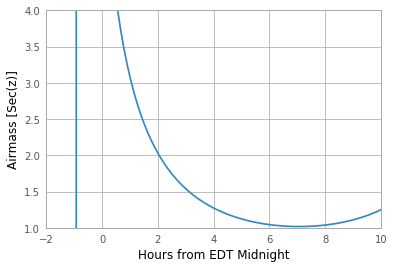

In [10]:
midnight = Time('2012-7-13 00:00:00') - utcoffset
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_July13night = AltAz(obstime=midnight+delta_midnight,
                          location=bear_mountain)
m33altazs_July13night = m33.transform_to(frame_July13night)

m33airmass_July13night = m33altazs_July13night.secz

plt.plot(delta_midnight, m33airmass_July13night)
plt.xlim(-2, 10)
plt.ylim(1, 4)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Airmass [Sec(z)]')
plt.show()

## Your turn: 

Now pick a different object (e.g. M31, M51, M101 or anything you like), use the location of Strawbridge Observatory (you will need to look up the latitude and longitude of Haverford (for ```height``` you can use 107m). Also use a time this semester you might go observing.  

Would out the altitude of your chosen object at your chosen time. Also make the plot of airmass overtime for your object. This should just be copy paste and small changes to the code.

Comment on your result (when you should observe your object, if you can). 